# Understanding the Data


In [ ]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Loading Traffic Volume Data
url = 'https://raw.githubusercontent.com/canaleal/Traffic-Volume-Processing/main/src/data/raw-data-1990-1999.csv'
dataset = pd.read_csv(url, sep=',')

In [ ]:
dataset.head()

,_id,count_id,count_date,location_id,location,lng,lat,centreline_type,centreline_id,px,...,ex_peds,wx_peds,nx_bike,sx_bike,ex_bike,wx_bike,nx_other,sx_other,ex_other,wx_other
0,1,2891,1990-08-21,4614,ELINOR AVE AT LAWRENCE AVE (PX 2178),-79.300554,43.744099,2.0,13451060.0,2178.0,...,4,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,2891,1990-08-21,4614,ELINOR AVE AT LAWRENCE AVE (PX 2178),-79.300554,43.744099,2.0,13451060.0,2178.0,...,5,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,2891,1990-08-21,4614,ELINOR AVE AT LAWRENCE AVE (PX 2178),-79.300554,43.744099,2.0,13451060.0,2178.0,...,4,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,2891,1990-08-21,4614,ELINOR AVE AT LAWRENCE AVE (PX 2178),-79.300554,43.744099,2.0,13451060.0,2178.0,...,2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,2891,1990-08-21,4614,ELINOR AVE AT LAWRENCE AVE (PX 2178),-79.300554,43.744099,2.0,13451060.0,2178.0,...,4,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
dataset.shape

(170047, 60)

In [ ]:
dataset['sb_bus_l'].describe()

count    163125.000000
mean          0.113110
std           0.652908
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          91.000000
Name: sb_bus_l, dtype: float64

In [ ]:
# Checking if Data has any duplicates
duplicates = dataset.duplicated()
dup_rows = dataset[duplicates]
tot_dup = duplicates.sum()
tot_dup


0

In [ ]:
#Printing columns with missing values
#print("Missing Values : %s" %str((dataset.isnull().sum())))

# Printing just columns with missing values instead
cols_miss_vals = dataset.columns[dataset.isnull().any()]

print('Therefore, there are', len(cols_miss_vals), 'columns with missing values and they are as follows: \n')
cols_miss_vals.tolist()


Therefore, there are 23 columns with missing values and they are as follows: 



['centreline_type',
 'centreline_id',
 'px',
 'sb_bus_r',
 'sb_bus_t',
 'sb_bus_l',
 'nb_bus_r',
 'nb_bus_t',
 'nb_bus_l',
 'wb_bus_r',
 'wb_bus_t',
 'wb_bus_l',
 'eb_bus_r',
 'eb_bus_t',
 'eb_bus_l',
 'nx_bike',
 'sx_bike',
 'ex_bike',
 'wx_bike',
 'nx_other',
 'sx_other',
 'ex_other',
 'wx_other']

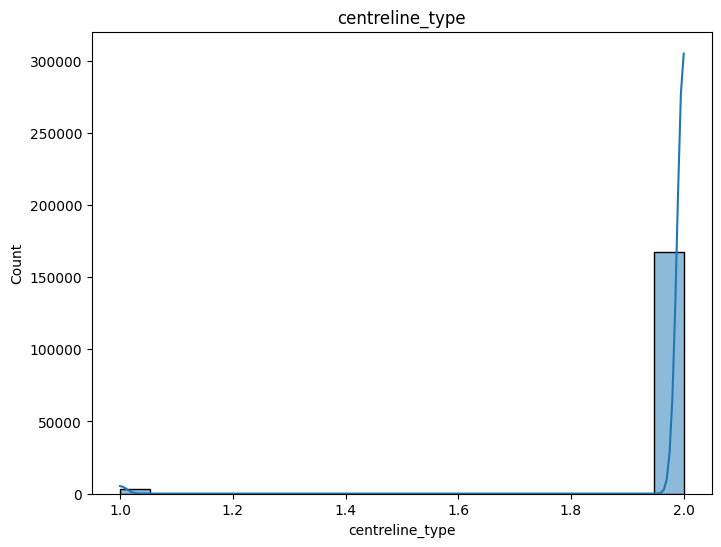

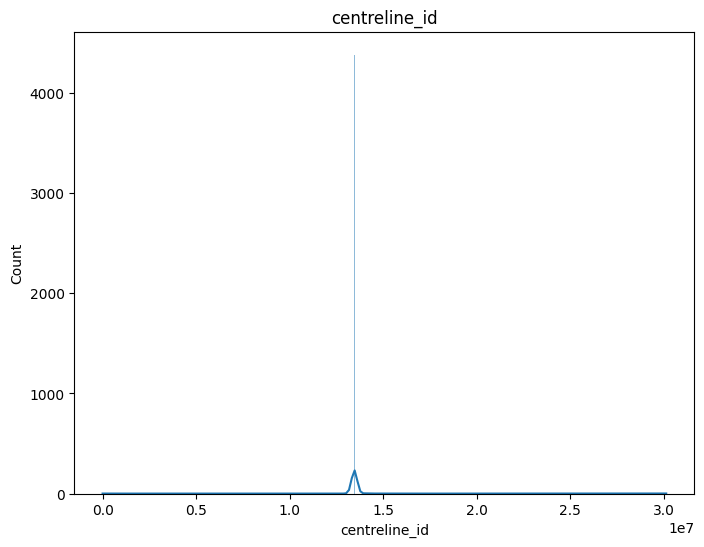

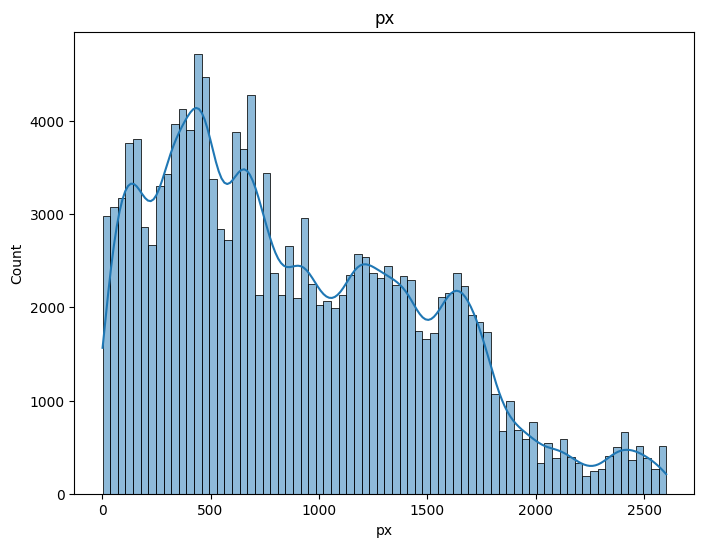

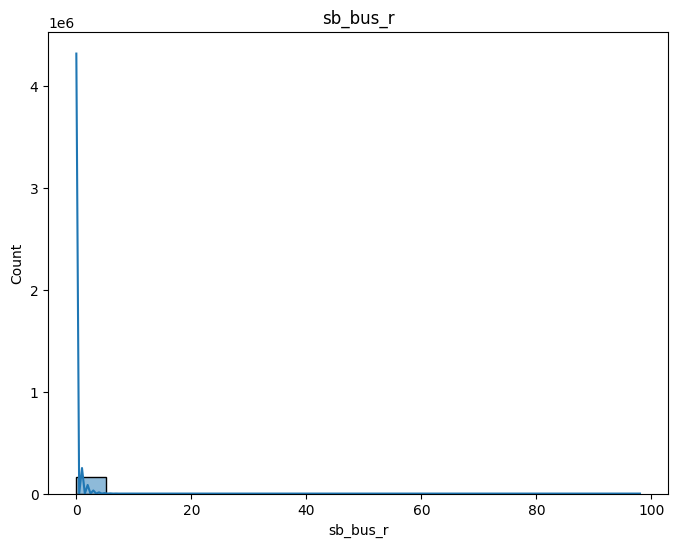

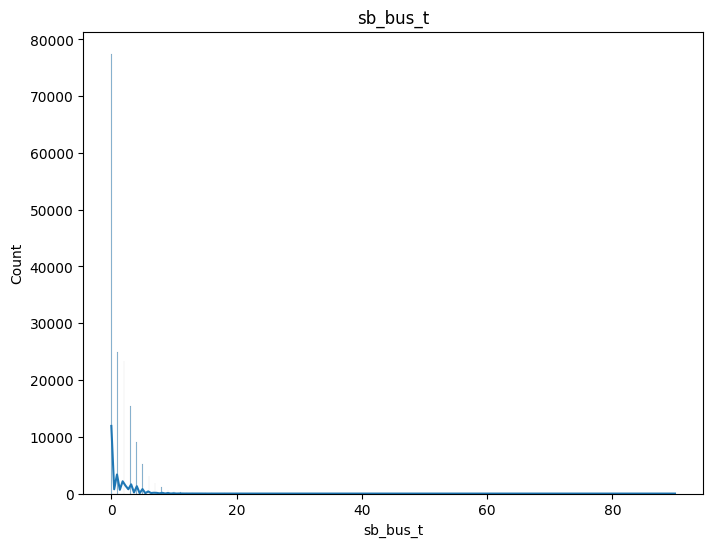

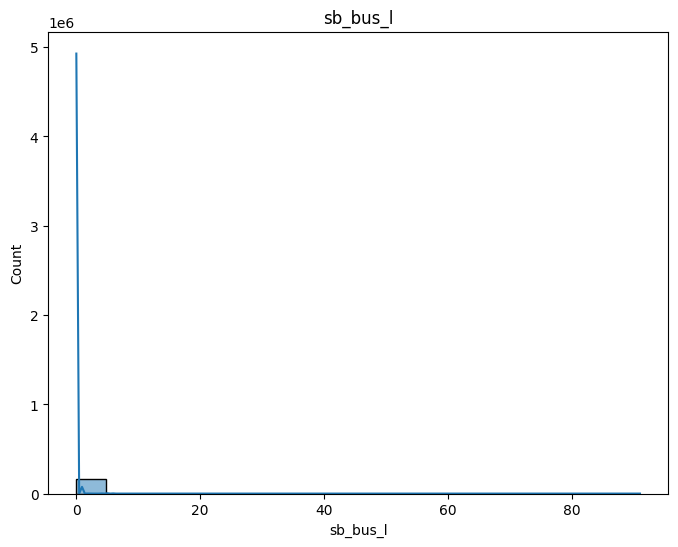

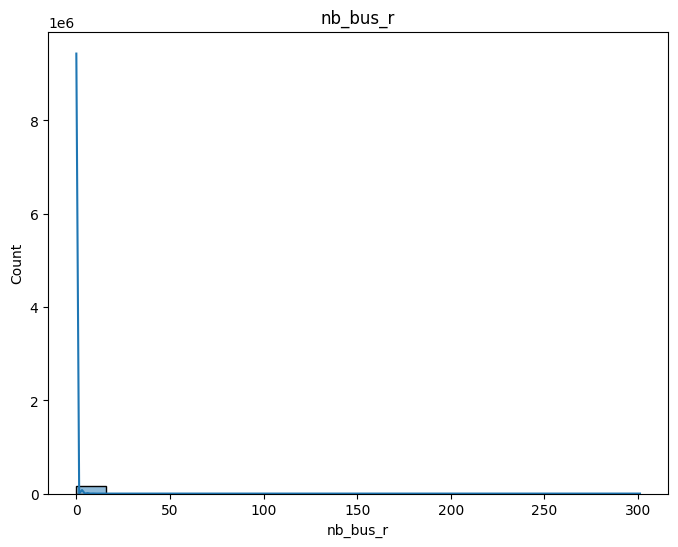

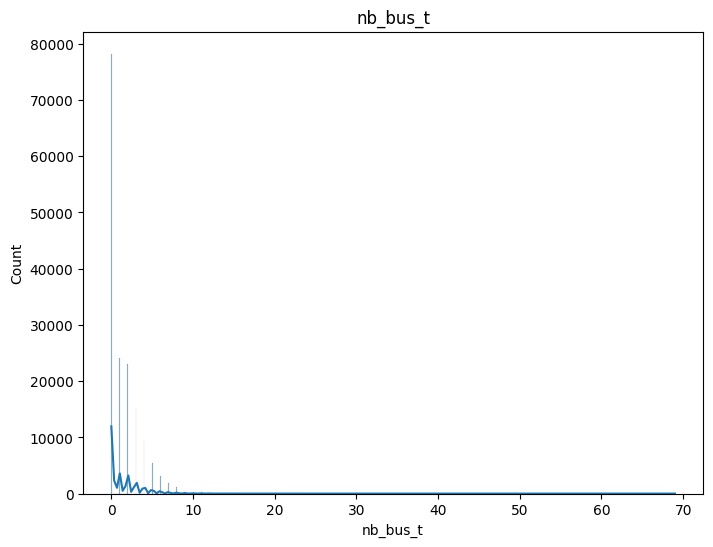

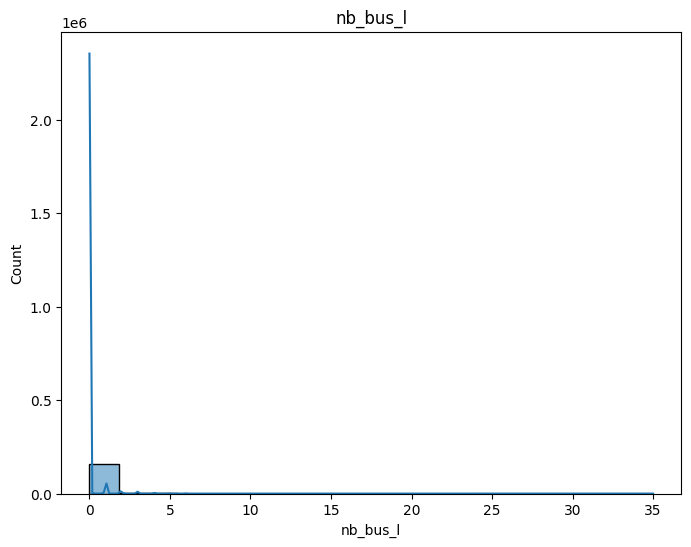

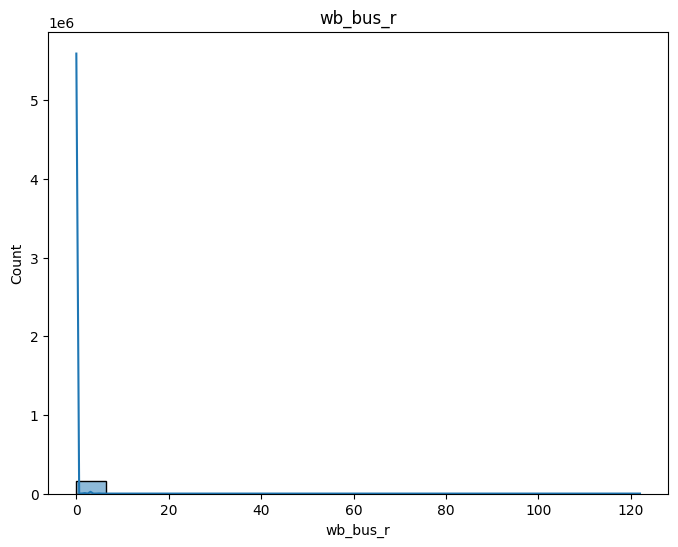

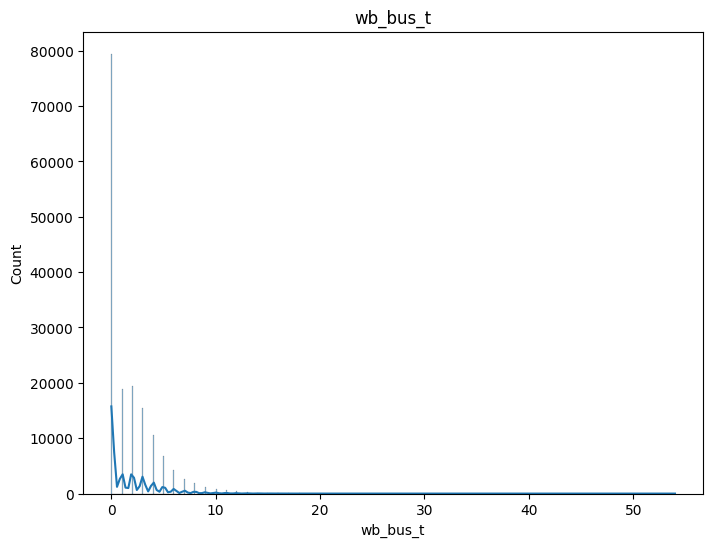

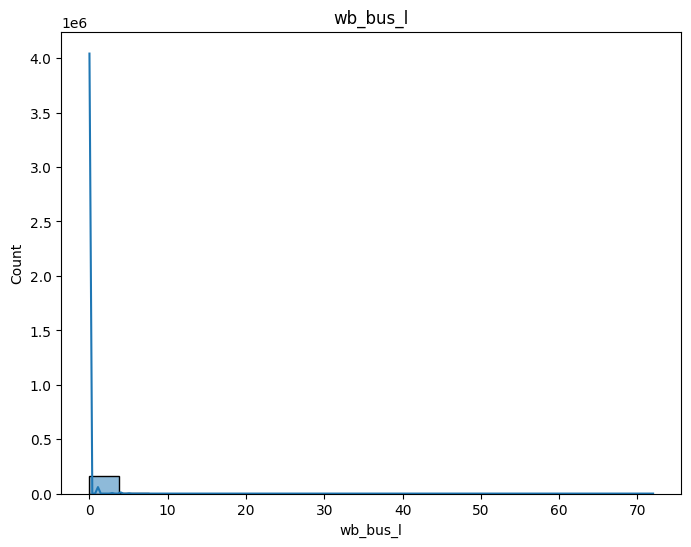

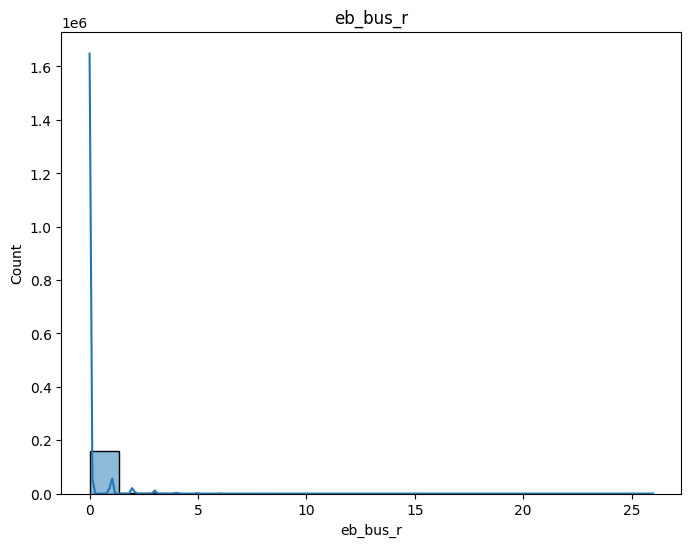

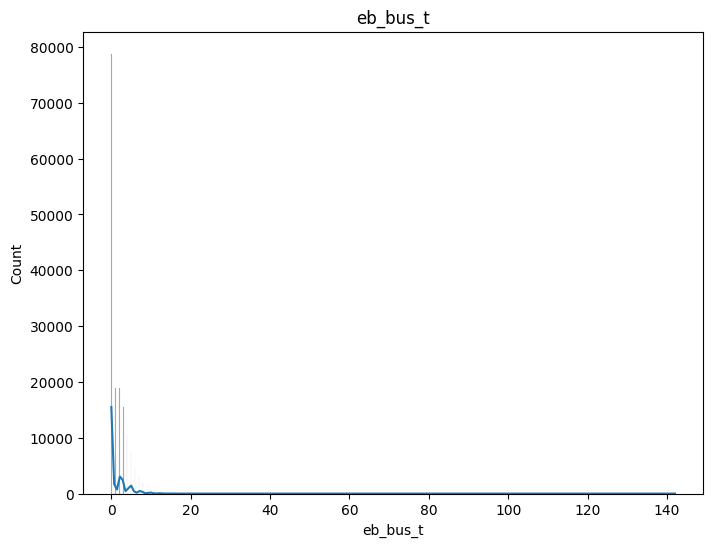

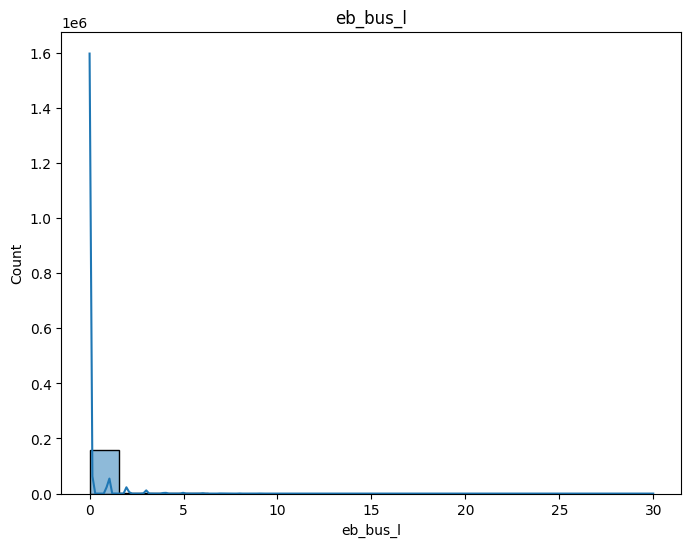

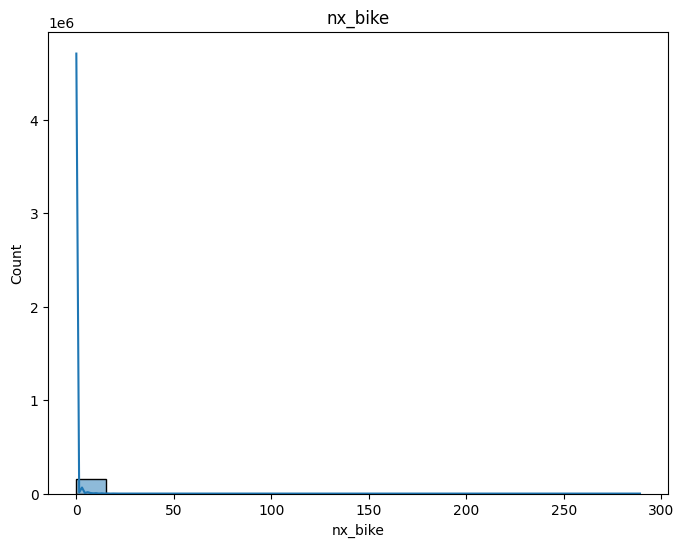

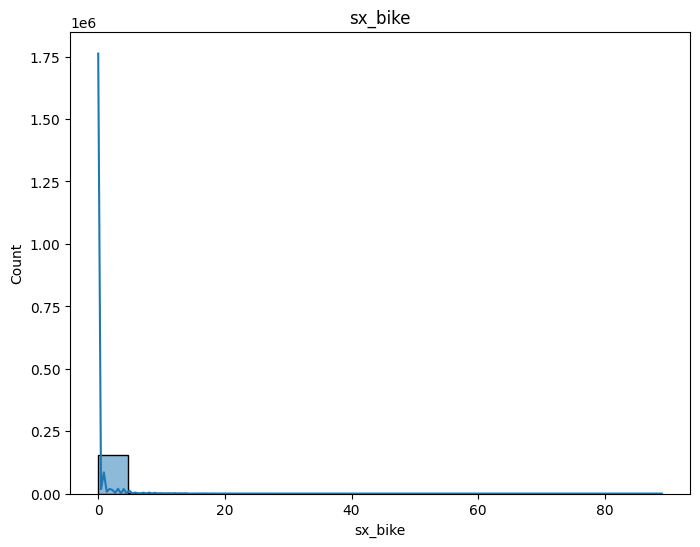

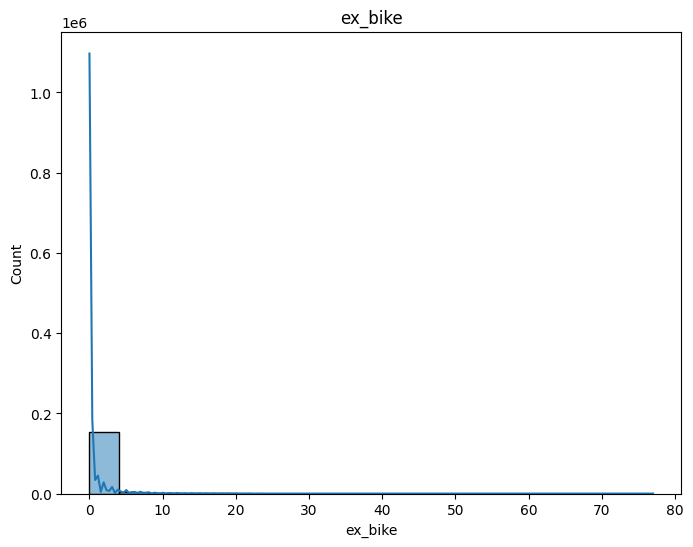

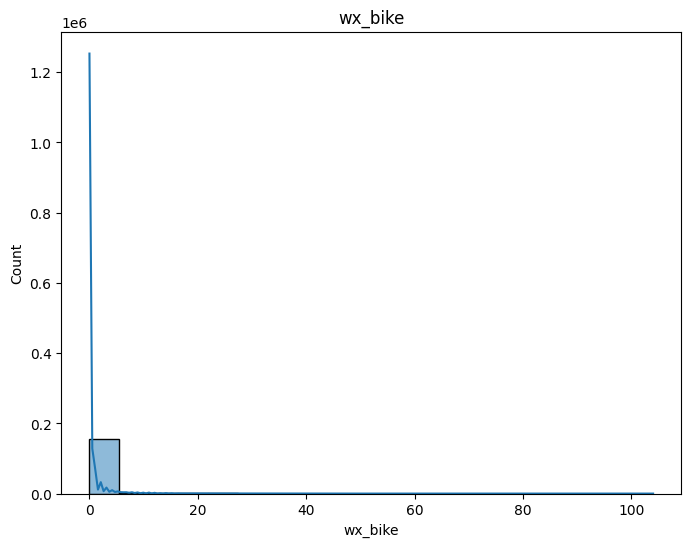

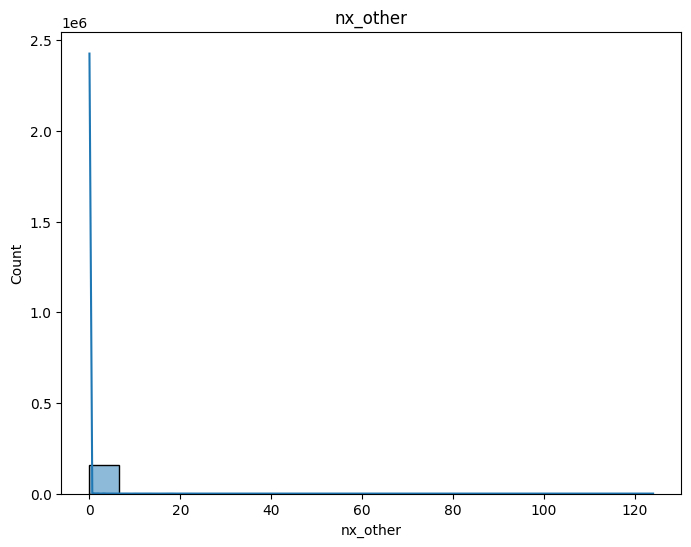

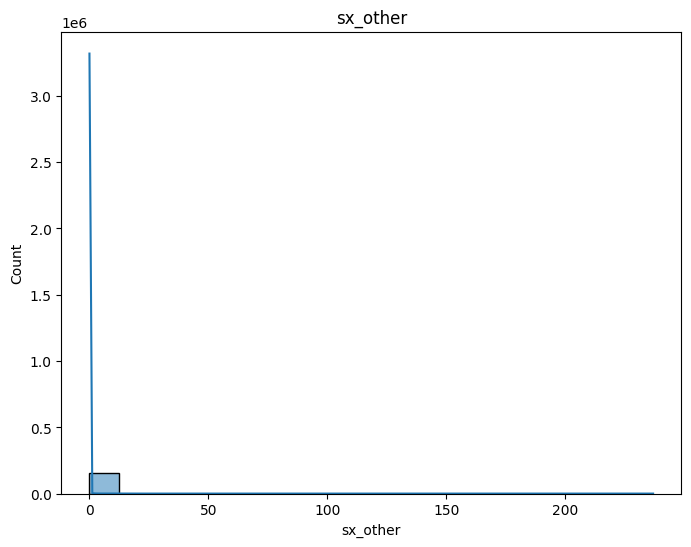

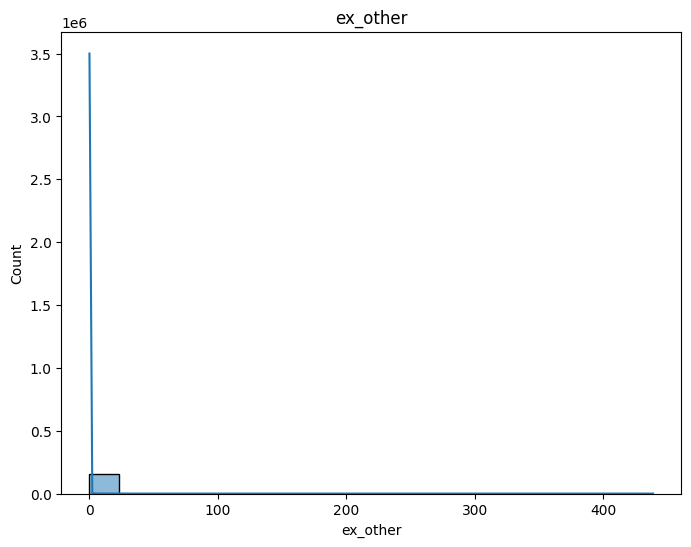

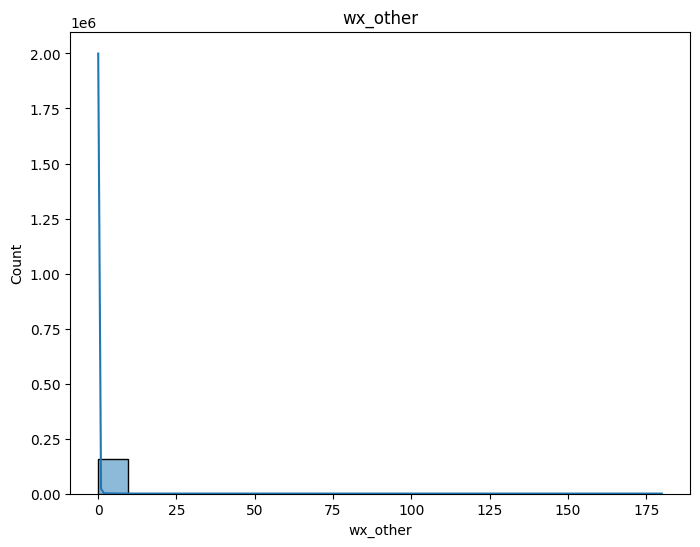

centreline_type is left-skewed
centreline_id is right-skewed
px is right-skewed
sb_bus_r is right-skewed
sb_bus_t is right-skewed
sb_bus_l is right-skewed
nb_bus_r is right-skewed
nb_bus_t is right-skewed
nb_bus_l is right-skewed
wb_bus_r is right-skewed
wb_bus_t is right-skewed
wb_bus_l is right-skewed
eb_bus_r is right-skewed
eb_bus_t is right-skewed
eb_bus_l is right-skewed
nx_bike is right-skewed
sx_bike is right-skewed
ex_bike is right-skewed
wx_bike is right-skewed
nx_other is right-skewed
sx_other is right-skewed
ex_other is right-skewed
wx_other is right-skewed


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

missing_values = dataset.isnull()

for column in missing_values.columns:
    if missing_values[column].any():
        plt.figure(figsize=(8, 6))
        sns.histplot(dataset[column].dropna(), kde=True)
        plt.title(column)
        plt.show()

for column in missing_values.columns:
    if missing_values[column].any():
        skewness = dataset[column].dropna().skew()
        if skewness > 0:
            print(f"{column} is right-skewed")
        elif skewness < 0:
            print(f"{column} is left-skewed")
        else:
            print(f"{column} is approximately symmetric")

# #Finding distribution of the columns with missing values



# # Calculate the number of rows and columns for the grid layout
# num_rows = 170047  # Adjust the number of rows as needed based on the number of columns
# num_cols = len(cols_miss_vals)  # Adjust the number of columns as needed to fit the graphs

# # Create a grid layout for the subplots
# fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, 12))
# fig.tight_layout(pad=3.0)  # Adjust the padding between subplots as needed

# # Iterate through the columns and plot the distribution graph
# for i, column in enumerate(cols_miss_vals):
#     row = i // num_cols
#     col = i % num_cols
#     ax = axes[row, col]
#     sns.histplot(dataset[column].dropna(), kde=True, ax=ax)
#     ax.set_title(column)

# # Remove any empty subplots
# if i < (num_rows * num_cols) - 1:
#     for j in range(i + 1, num_rows * num_cols):
#         fig.delaxes(axes.flatten()[j])

# # Show the plot
# plt.show()

In [ ]:
# Handling missing values
from scipy import stats

# Calculate z-scores
z_scores = stats.zscore(dataset['centreline_type',
 'centreline_id',
 'px',
 'sb_bus_r',
 'sb_bus_t',
 'sb_bus_l',
 'nb_bus_r',
 'nb_bus_t',
 'nb_bus_l',
 'wb_bus_r',
 'wb_bus_t',
 'wb_bus_l',
 'eb_bus_r',
 'eb_bus_t',
 'eb_bus_l',
 'nx_bike',
 'sx_bike',
 'ex_bike',
 'wx_bike',
 'nx_other',
 'sx_other',
 'ex_other',
 'wx_other'])

# Identify outliers based on z-scores
outlier_threshold = 3  # Adjust as needed
outlier_indices = (abs(z_scores) > outlier_threshold).any(axis=1)
outlier_data = dataset[outlier_indices]

# Identify outliers based on IQR
q1 = dataset.quantile(0.25)
q3 = dataset.quantile(0.75)
iqr = q3 - q1
outlier_indices = ((dataset < (q1 - 1.5 * iqr)) | (dataset > (q3 + 1.5 * iqr))).any(axis=1)
outlier_data = dataset[outlier_indices]

KeyError: ignored